In [1]:
import pdfplumber
import os
import pandas as pd
import statsmodels.api as sm
import numpy as np
import matplotlib.pyplot as plt

In [2]:
pdf_path = os.path.join(os.path.expanduser("~/Desktop/Trading/Data"), "spdr-sector-and-industry-dashboard.pdf")

pages_to_extract = [5, 6, 7]

with pdfplumber.open(pdf_path) as pdf:
    for i in pages_to_extract:
        page = pdf.pages[i]
        tables = page.extract_tables()
        print(f"\n--- Page {i+1}: Found {len(tables)} tables ---")
        for j, table in enumerate(tables):
            print(f"\nTable {j+1}:")
            for row in table:
                print(row)


--- Page 6: Found 2 tables ---

Table 1:
['ETF Name', 'Fundamentals', None, None, None, None, 'International\nExposure', 'Macro Sensitivies (Beta)', None, None, None, None]
[None, 'Price\nto\nBook', 'Price to\nEarnings\n(FY1)', 'Return\non Equity\n(%)', 'LT\nDebt to\nCapital\n(%)', 'EST\n3–5\nYears\nEPS\nGrowth\n(%)', '% Foreign Sales', 'US $\n(36 Mth)', 'US\n10 Year\nYield\n(36 Mth)', 'Brent\nCrude Oil\n(36 Mth)', 'AUM ($M)', '3 Month\nFund Flow\n($M)']

Table 2:
['Kensho', None, None, None, None, None, None, None, None, None, None, None, None, None]
['KOMP', 'SPDR Kensho S&P New Economies ETF', '2.27', '16.7', '6.8', '33.37', '14.2', '39.14', '-1.40', '-0.48', '-0.03', '1,950', '26', '5.0']
['FITE', 'SPDR S&P Kensho Future Security ETF', '2.71', '20.7', '8.9', '28.82', '12.4', '42.75', '-0.72', '-0.30', '-0.03', '83', '6', '0.6']
['ROKT', 'SPDR S&P Kensho Final Frontier ETF', '2.47', '20.2', '14.0', '44.37', '8.5', '36.56', '-1.19', '-0.34', '-0.03', '19', '0', '0.2']
['CNRG', 'SPDR

In [3]:
column_names = [
    'ETF Name', 'Price_to_Book', 'PE_Ratio', 'ROE', 'LT_Debt_to_Cap',
    'EPS_Growth_Next5Y', 'Foreign_Sales_Pct', 'USD_Beta', '10Y_Yield_Beta',
    'Brent_Beta', 'AUM_M', '3M_Fund_Flow_M'
]

In [14]:
pdf_path = os.path.join(os.path.expanduser("~/Desktop/Trading/Data"), "spdr-sector-and-industry-dashboard.pdf")

pages_to_extract = [5, 6, 7]

dfs = []

with pdfplumber.open(pdf_path) as pdf:
    for i in pages_to_extract:
        page = pdf.pages[i]
        tables = page.extract_tables()

        if tables:
            print(f"--- Page {i+1}: Found {len(tables)} tables ---")

            # Get the correct header row (second row of Table 1)
            raw_header = tables[0][1]

            # Fix the header
            raw_header[0] = 'Ticker'
            raw_header.insert(1, 'ETF Name')
            raw_header.insert(2,'P_B')
            raw_header.insert(3, 'P_E')
            raw_header.insert(4,'ROE')
            raw_header.insert(5, 'LT_Debt_to_Capital')
            raw_header.insert(6,'EPS_growth_4_years')
            raw_header.insert(7, '%_foriegn_sales')
            raw_header.insert(8,'beta_USD')
            raw_header.insert(9, 'beta_10_yr_treasury')
            raw_header.insert(10,'beta_crude_oil')
            raw_header.insert(11, 'AUM')
            raw_header.insert(12,'3_month_money_flow')


            print(f"⚙️ Adjusted header (len={len(raw_header)}): {raw_header}")

            # Process data rows from Table 2
            for row in tables[1][1:]:
                # Trim or pad each data row to match the header length
                if len(row) < len(raw_header):
                    row += [None] * (len(raw_header) - len(row))
                elif len(row) > len(raw_header):
                    row = row[:len(raw_header)]

                dfs.append(dict(zip(raw_header, row)))

# Convert to DataFrame
full_df = pd.DataFrame(dfs)

# Quick check
print(full_df.shape)

--- Page 6: Found 2 tables ---
⚙️ Adjusted header (len=24): ['Ticker', 'ETF Name', 'P_B', 'P_E', 'ROE', 'LT_Debt_to_Capital', 'EPS_growth_4_years', '%_foriegn_sales', 'beta_USD', 'beta_10_yr_treasury', 'beta_crude_oil', 'AUM', '3_month_money_flow', 'Price\nto\nBook', 'Price to\nEarnings\n(FY1)', 'Return\non Equity\n(%)', 'LT\nDebt to\nCapital\n(%)', 'EST\n3–5\nYears\nEPS\nGrowth\n(%)', '% Foreign Sales', 'US $\n(36 Mth)', 'US\n10 Year\nYield\n(36 Mth)', 'Brent\nCrude Oil\n(36 Mth)', 'AUM ($M)', '3 Month\nFund Flow\n($M)']
--- Page 7: Found 2 tables ---
⚙️ Adjusted header (len=24): ['Ticker', 'ETF Name', 'P_B', 'P_E', 'ROE', 'LT_Debt_to_Capital', 'EPS_growth_4_years', '%_foriegn_sales', 'beta_USD', 'beta_10_yr_treasury', 'beta_crude_oil', 'AUM', '3_month_money_flow', 'Price\nto\nBook', 'Price to\nEarnings\n(FY1)', 'Return on\nEquity\n(%)', 'LT\nDebt to\nCapital\n(%)', 'EST\n3–5\nYears\nEPS\nGrowth\n(%)', '% Foreign Sales', 'US $\n(36 Mth)', 'US\n10 Year\nYield\n(36 Mth)', 'Brent\nCrude 

In [15]:
# Drop rows with index 6 and 27
clean_df = full_df.drop(index=[6, 27]).reset_index(drop=True)

print(clean_df.shape)
clean_df.head(45)

(37, 25)


,Ticker,ETF Name,P_B,P_E,ROE,LT_Debt_to_Capital,EPS_growth_4_years,%_foriegn_sales,beta_USD,beta_10_yr_treasury,...,Return\non Equity\n(%),LT\nDebt to\nCapital\n(%),EST\n3–5\nYears\nEPS\nGrowth\n(%),% Foreign Sales,US $\n(36 Mth),US\n10 Year\nYield\n(36 Mth),Brent\nCrude Oil\n(36 Mth),AUM ($M),3 Month\nFund Flow\n($M),Return on\nEquity\n(%)
0,KOMP,SPDR Kensho S&P New Economies ETF,2.27,16.7,6.8,33.37,14.2,39.14,-1.40,-0.48,...,NaN,None,None,None,None,None,None,None,None,NaN
1,FITE,SPDR S&P Kensho Future Security ETF,2.71,20.7,8.9,28.82,12.4,42.75,-0.72,-0.30,...,NaN,None,None,None,None,None,None,None,None,NaN
2,ROKT,SPDR S&P Kensho Final Frontier ETF,2.47,20.2,14.0,44.37,8.5,36.56,-1.19,-0.34,...,NaN,None,None,None,None,None,None,None,None,NaN
3,CNRG,SPDR S&P Kensho Clean Power ETF,0.96,14.5,7.5,44.91,15.5,26.34,-1.69,-0.60,...,NaN,None,None,None,None,None,None,None,None,NaN
4,None,SPDR S&P Kensho Smart Mobility ETF,1.67,12.5,1.0,33.00,17.1,53.31,-1.79,-0.56,...,NaN,None,None,None,None,None,None,None,None,NaN
5,SIMS,SPDR S&P Kensho Intelligent\nStructures ETF,2.33,16.5,10.9,33.02,10.9,32.20,-1.44,-0.46,...,NaN,None,None,None,None,None,None,None,None,NaN
6,None,SPDR S&P Biotech ETF,3.27,15.6,-13.0,36.65,7.2,18.03,-1.30,-0.38,...,NaN,None,None,None,None,None,None,None,None,NaN
7,XHS,SPDR S&P Health Care Services ETF,2.29,16.5,1.9,48.74,11.4,2.20,-1.27,-0.42,...,NaN,None,None,None,None,None,None,None,None,NaN
8,XHE,SPDR S&P Health Care Equipment ETF,2.57,18.4,-0.5,33.83,13.4,33.57,-1.62,-0.47,...,NaN,None,None,None,None,None,None,None,None,NaN
9,XPH,SPDR S&P Pharmaceuticals ETF,2.70,10.3,3.0,40.03,5.3,21.58,-1.16,-0.35,...,NaN,None,None,None,None,None,None,None,None,NaN


In [6]:
# Convert columns to numeric, coercing errors to NaN
full_df['P_E'] = pd.to_numeric(full_df['P_E'], errors='coerce')
full_df['EPS_growth_4_years'] = pd.to_numeric(full_df['EPS_growth_4_years'], errors='coerce')

# Drop rows with missing values in P_E or EPS_growth_4_years
reg_df = full_df.dropna(subset=['P_E', 'EPS_growth_4_years']).copy()

# Log-transform the P/E ratio
reg_df['ln_PE'] = np.log(reg_df['P_E'])

# Setup regression
X = sm.add_constant(reg_df['EPS_growth_4_years'])
y = reg_df['ln_PE']

model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  ln_PE   R-squared:                       0.027
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                    0.9611
Date:                Tue, 08 Jul 2025   Prob (F-statistic):              0.334
Time:                        17:40:03   Log-Likelihood:                -6.3269
No. Observations:                  37   AIC:                             16.65
Df Residuals:                      35   BIC:                             19.88
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  2.7063      0

In [7]:
print(reg_df[['P_E', 'ln_PE']].head())

    P_E     ln_PE
0  16.7  2.815409
1  20.7  3.030134
2  20.2  3.005683
3  14.5  2.674149
4  12.5  2.525729


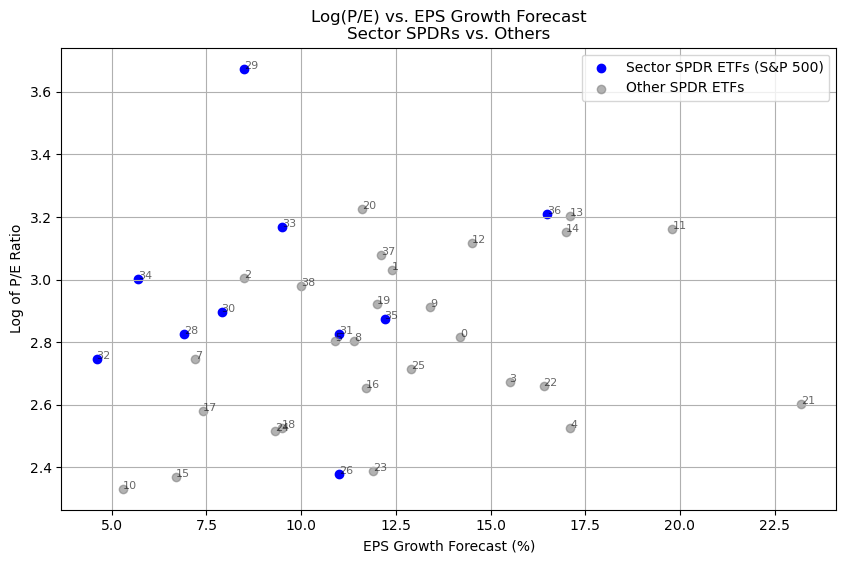

In [8]:
# Scatterplot
plt.figure(figsize=(10, 6))

# Plot Sector SPDR ETFs (indices 26-36)
plt.scatter(
    reg_df.loc[26:36, 'EPS_growth_4_years'],
    reg_df.loc[26:36, 'ln_PE'],
    color='blue', label='Sector SPDR ETFs (S&P 500)'
)

# Plot all other ETFs
others_mask = ~reg_df.index.isin(range(26, 37))
plt.scatter(
    reg_df.loc[others_mask, 'EPS_growth_4_years'],
    reg_df.loc[others_mask, 'ln_PE'],
    color='gray', alpha=0.6, label='Other SPDR ETFs'
)

# Add labels for each point (optional for debugging)
for i in reg_df.index:
    plt.text(
        reg_df.loc[i, 'EPS_growth_4_years'],
        reg_df.loc[i, 'ln_PE'],
        str(i),
        fontsize=8, color='black', alpha=0.6
    )

# Labels and title
plt.xlabel('EPS Growth Forecast (%)')
plt.ylabel('Log of P/E Ratio')
plt.title('Log(P/E) vs. EPS Growth Forecast\nSector SPDRs vs. Others')
plt.legend()
plt.grid(True)
plt.show()


In [9]:
# Isolate sector SPDR ETFs (rows 26 to 36)
sector_df = reg_df.loc[26:36].copy()

# Set up regression
X_sector = sm.add_constant(sector_df['EPS_growth_4_years'])
y_sector = sector_df['ln_PE']

model_sector = sm.OLS(y_sector, X_sector).fit()

print(model_sector.summary())


                            OLS Regression Results                            
Dep. Variable:                  ln_PE   R-squared:                       0.010
Model:                            OLS   Adj. R-squared:                 -0.114
Method:                 Least Squares   F-statistic:                   0.08151
Date:                Tue, 08 Jul 2025   Prob (F-statistic):              0.783
Time:                        17:40:04   Log-Likelihood:                -2.8553
No. Observations:                  10   AIC:                             9.711
Df Residuals:                       8   BIC:                             10.32
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  2.8684      0

/Users/nicholassanso/anaconda3/envs/dsi/lib/python3.8/site-packages/scipy/stats/_stats_py.py:1736: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [10]:
# Isolate sector SPDR ETFs (rows 26 to 36)
sector_df = reg_df.loc[0:25].copy()

# Set up regression
X_sector = sm.add_constant(sector_df['EPS_growth_4_years'])
y_sector = sector_df['ln_PE']

model_sector = sm.OLS(y_sector, X_sector).fit()

print(model_sector.summary())


                            OLS Regression Results                            
Dep. Variable:                  ln_PE   R-squared:                       0.145
Model:                            OLS   Adj. R-squared:                  0.108
Method:                 Least Squares   F-statistic:                     3.908
Date:                Tue, 08 Jul 2025   Prob (F-statistic):             0.0602
Time:                        17:40:04   Log-Likelihood:               -0.40292
No. Observations:                  25   AIC:                             4.806
Df Residuals:                      23   BIC:                             7.244
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  2.4724      0

In [11]:
# Convert columns to numeric with coercion
full_df['P_E'] = pd.to_numeric(full_df['P_E'], errors='coerce')
full_df['EPS_growth_4_years'] = pd.to_numeric(full_df['EPS_growth_4_years'], errors='coerce')

# Drop rows where either is missing or zero (to avoid log(0) errors)
reg_df = full_df.dropna(subset=['P_E', 'EPS_growth_4_years']).copy()
reg_df = reg_df[(reg_df['P_E'] > 0) & (reg_df['EPS_growth_4_years'] > 0)]

# Log-transform both variables
reg_df['ln_PE'] = np.log(reg_df['P_E'])
reg_df['ln_Growth'] = np.log(reg_df['EPS_growth_4_years'])

# Set up regression: ln_PE ~ ln_Growth
X = sm.add_constant(reg_df['ln_Growth'])
y = reg_df['ln_PE']

model = sm.OLS(y, X).fit()

print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                  ln_PE   R-squared:                       0.038
Model:                            OLS   Adj. R-squared:                  0.010
Method:                 Least Squares   F-statistic:                     1.382
Date:                Tue, 08 Jul 2025   Prob (F-statistic):              0.248
Time:                        17:40:04   Log-Likelihood:                -6.1116
No. Observations:                  37   AIC:                             16.22
Df Residuals:                      35   BIC:                             19.45
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.4726      0.317      7.802      0.0